# In Class Practice for Lecture 16

#### Work through this during the lecture

### Task 1

* Download the data from [here](https://ourworldindata.org/coronavirus)
* import numpy, pandas, matplotlib.pyplot
* import the *curve_fit* command from the **scipy.optimize package**

* Replace all zero values in 'new_cases' and their corresponding value in 'total_cases' with NaN

* Load the data into a pandas data frame and print the first five rows to confirm



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

covid = pd.read_csv("./covid_data.csv")

"""
for index in range(0,len(covid["new_cases"])):
    if covid.iat[index,5] == 0:
        covid.iat[index,5] = "nan"
        covid.iat[index,4] = "nan"
print(covid.head())
"""

covid = covid[covid["new_cases"]!=0]




### Task 2

* Import the **time** package
* From  the **datetime** package import **datetime** and **timedelta**
* The documentation for the datetime package can be found here: [DateTime Doc](https://docs.python.org/3/library/datetime.html)

* Create a new column in the dataframe called "DT" and fill it with the dates converted to datetime objects

* Using this new DT column, remove all data from after 2022-12-31

* Calculate the number of days since 2019-12-31 and store the values in a new column called "days"

In [2]:
import time
from datetime import datetime, timedelta

covid["DT"] = pd.to_datetime(covid["date"])
date_zero = datetime.strptime('2020-2-24', '%Y-%m-%d')
date = covid["DT"]
covid["Days"] = date.map(lambda x: (x-date_zero).days)

print(covid.head())




   iso_code continent     location     date  total_cases  new_cases  \
0       AFG      Asia  Afghanistan  2/24/20          5.0        5.0   
12      AFG      Asia  Afghanistan   3/7/20          8.0        3.0   
16      AFG      Asia  Afghanistan  3/11/20         11.0        3.0   
19      AFG      Asia  Afghanistan  3/14/20         14.0        3.0   
20      AFG      Asia  Afghanistan  3/15/20         20.0        6.0   

    total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0            NaN         NaN                    0.126                  0.126   
12           NaN         NaN                    0.201                  0.075   
16           NaN         NaN                    0.276                  0.075   
19           NaN         NaN                    0.351                  0.075   
20           NaN         NaN                    0.502                  0.151   

    ...  gdp_per_capita  extreme_poverty  life_expectancy  \
0   ...        1803.987        

### Task 3: Generating Time Series

* Generate a time series plot of the total global cases using .plot() from pandas (DataFrame.plot(...))

* Generate the same plot but using matplotlib

* Now generate new plots using the datetime objects we produced and log the y axis. Try this using DataFrame.plot() and plt.plot()

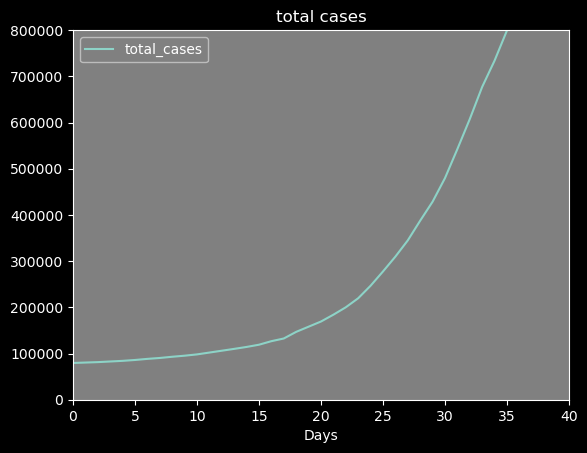

In [3]:

plt.rcParams['axes.facecolor'] = 'gray'
covid[covid["location"]=="World"].plot("Days","total_cases",\
        kind="line", title="total cases",\
            ylim=[0,800000],xlim=[0,40])

plt.show()

### Task 4: Generate a time series with more data

* We can plot the total cases together with the total dauly new cases using matplotlib.

* Pick a country to plot (e.g. China or UK)

* Filter the data by your selected country and plot the total cases and daily cases on the same figure

* You should use a line plot for the total cases and a bar chart for the daily cases. Make sure they share the same axes


c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\pandas\plotting\_matplotlib\core.py:515: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


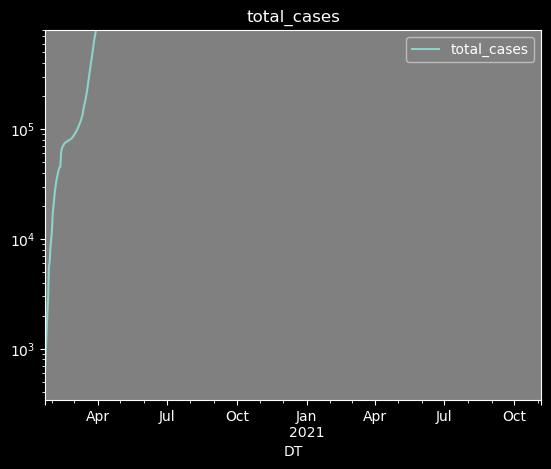

In [4]:
covid[covid["location"]=="World"].plot("DT","total_cases",\
        kind="line",title="total_cases",\
            ylim=[0,800000],logy=True)
# y轴坐标变成对数
plt.legend()
plt.show()

### Task 4.5: Generate a time series for multiple nations

* Create a list called countries at least 7 nations of your choice (try to pick larger countries)

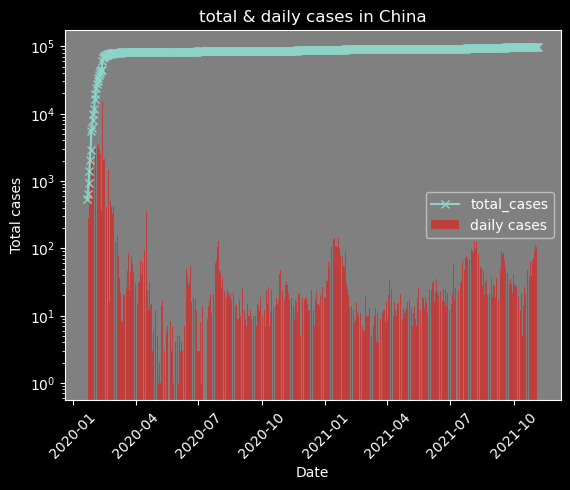

In [5]:
C = "China"

date_zero = datetime.strptime('2020-1-1', '%Y-%m-%d')

covid_China = covid[(covid["location"]==C) & (covid["DT"]>date_zero)]

plt.plot(covid_China["DT"],covid_China["total_cases"],"-x",label="total_cases")

plt.bar(covid_China["DT"],covid_China["new_cases"],color='r',label="daily cases",alpha=0.5)

plt.yscale('log')
plt.xticks(rotation=45)# x坐标标识旋转45度
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.title("total & daily cases in China")
plt.legend()
plt.show()



### Task 5: Generate Time Series with Selection Criteria


* Create a new set of all the countries in the dataframe

* Create a plot using a for-if loop for all countries where there have been more than 5,000,000 cases.
* Note you will need to filter out some entries such as 'World', 'High Income' and 'European Union'

* Make sure your plot is well presented

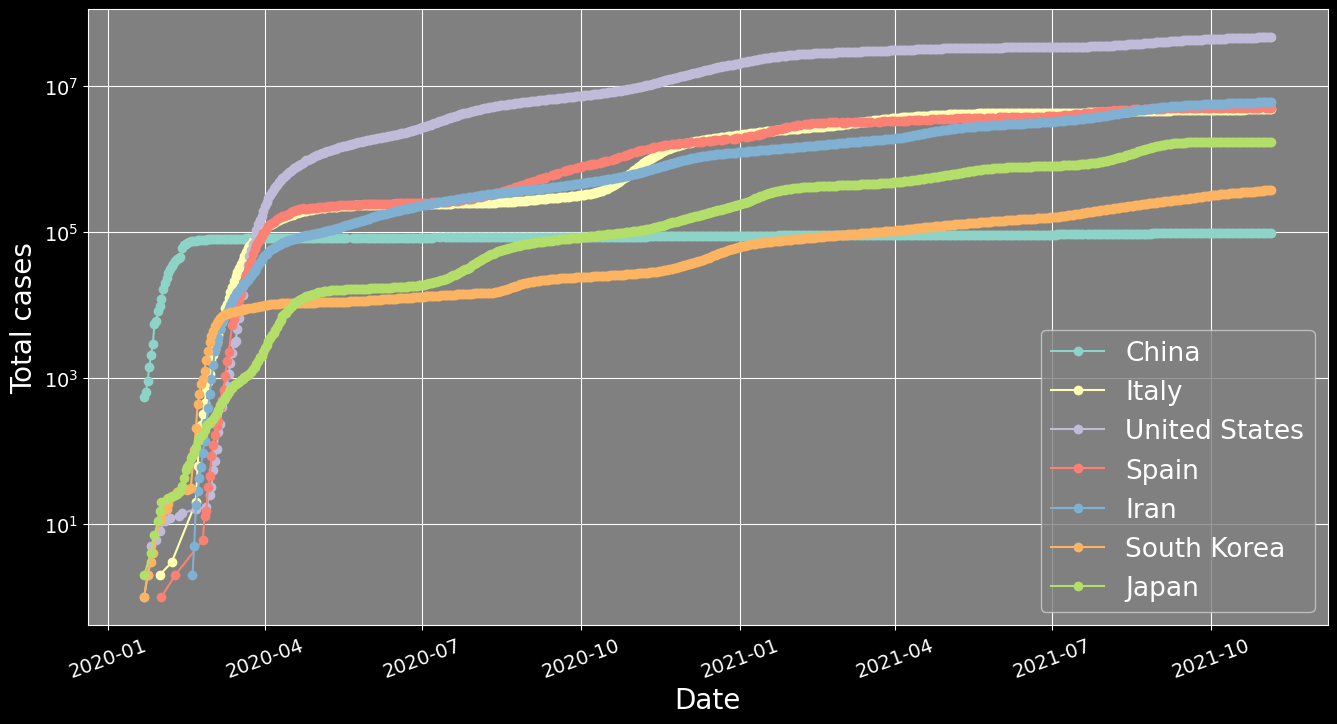

['Myanmar', 'Pakistan', 'Gibraltar', 'Bulgaria', 'Taiwan', 'Bolivia', 'Tuvalu', 'Peru', 'Armenia', 'Aruba']


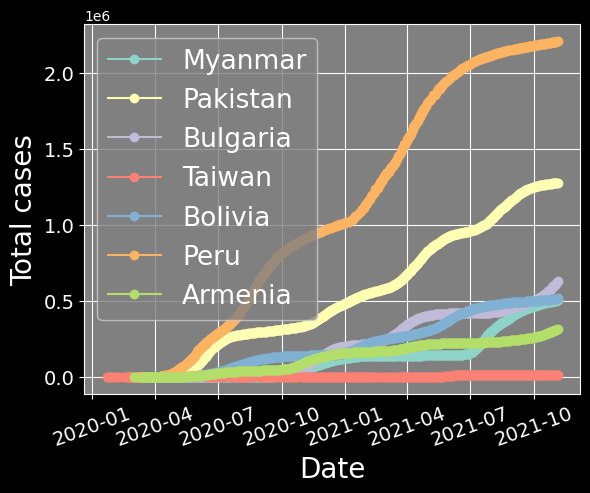

In [16]:
countries = ["China","Italy","United States","Spain","Iran","South Korea","Japan"]
date_zero = datetime.strptime('2020-1-1', '%Y-%m-%d')

plt.figure(figsize=(16,8))

for C in countries:
    df_c = covid[(covid["location"]==C)&(covid["DT"]>date_zero)]
    plt.plot(df_c["DT"],df_c["total_cases"],'-o',label=C)

plt.yscale("log")
plt.xticks(rotation=20,fontsize=14)# x坐标标识旋转45度
plt.yticks(fontsize=14)# x坐标标识旋转45度
plt.xlabel("Date",fontsize=20)
plt.ylabel("Total cases",fontsize=20)
plt.legend(fontsize=19)
plt.grid()
plt.show()



countries = list(set(covid["location"]))[:10]
print(countries)
for C in countries:
    if (covid[covid["location"]==C]["total_cases"].max()>10000)\
        &(C!="World"):
        df_c = covid[covid["location"]==C]
        plt.plot(df_c["DT"],df_c["total_cases"],'-o',label=C)


plt.xticks(rotation=20,fontsize=14)# x坐标标识旋转45度
plt.yticks(fontsize=14)# x坐标标识旋转45度
plt.xlabel("Date",fontsize=20)
plt.ylabel("Total cases",fontsize=20)
plt.legend(fontsize=19)
plt.grid()
plt.show()


### Task 6: Linear Fitting

* Plot the total cases in the US as a function of time starting from 2020-3-1 until 2020-12-31
* Use a linear y axis for this plot

* Try fitting the curve with a linear function $y=ax+b$
* Try fitting again with a quadratic function $y=ax^2+bx+c$
* Fit again with a 5th-order polynomial: $y=ax^5+bx+c$

* Plot all three lines on the same figure, and label them accordingly in the legend

* Adjust line styles, marker transparencies etc. to make sure your plot is clear


<class 'datetime.datetime'>


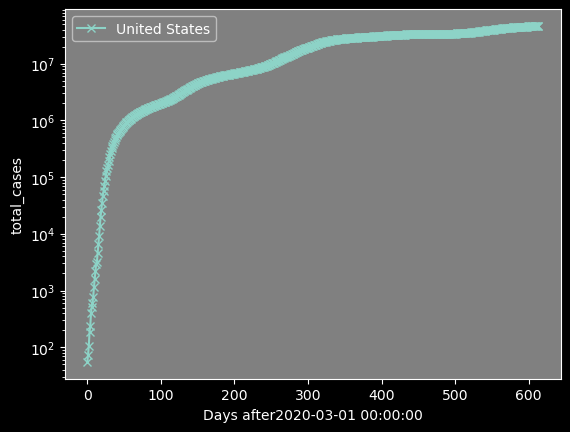

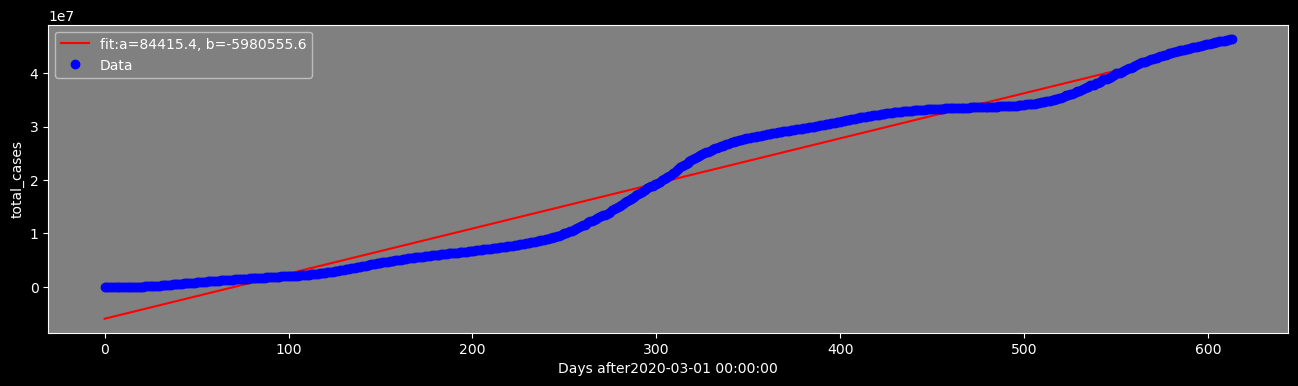

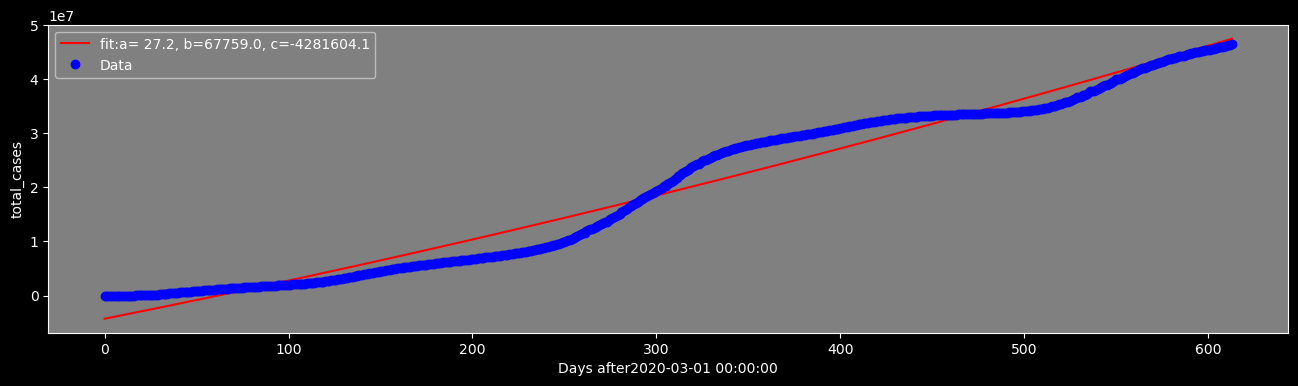

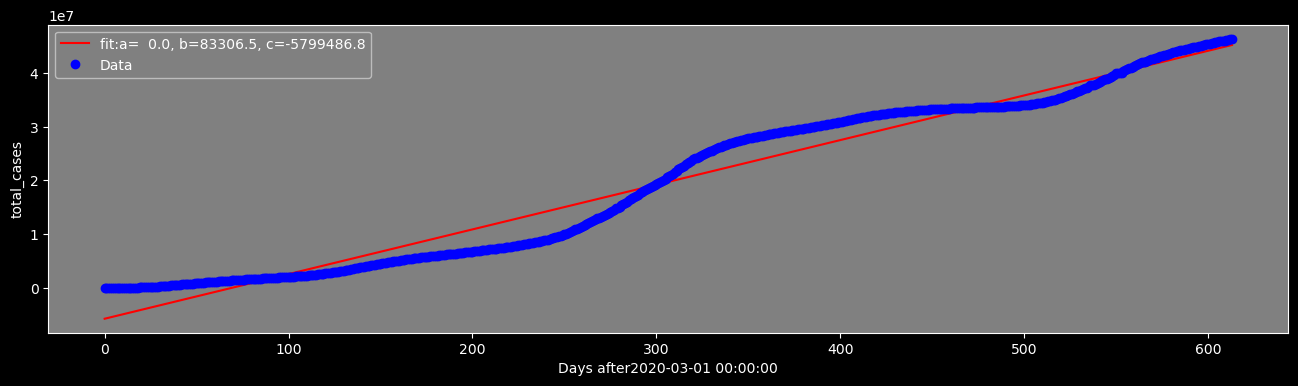

In [27]:
C = "United States"
date_zero = datetime.strptime('2020-3-1', '%Y-%m-%d')
df_us = covid[(covid["location"]==C)&(covid["DT"]>date_zero)]

days = np.arange(df_us["DT"].size)# 功能和len一样的，数据集是每天记录的

plt.plot(days,df_us["total_cases"],'-x',label=C)
plt.yscale('log')
plt.xlabel("Days after"+str(date_zero))
plt.ylabel("total_cases")
plt.legend()
plt.show()

def linear(x,a,b):
    return a*x + b
def quad(x,a,b,c):
    return a*x**2+b*x+c
def poly(x,a,b,c):
    return a*x**5+b*x+c


plt.figure(figsize=(16,4))
popt,pcov = curve_fit(linear,days,df_us["total_cases"])
plt.yscale("linear")
plt.plot(days,linear(days,*popt),'r-',label="fit:a=%5.1f, b=%5.1f"%tuple(popt))
plt.plot(days,df_us["total_cases"],'bo',label="Data")
plt.xlabel("Days after"+str(date_zero))
plt.ylabel("total_cases")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
popt,pcov = curve_fit(quad,days,df_us["total_cases"])
plt.plot(days,quad(days,*popt),'r-',label="fit:a=%5.1f, b=%5.1f, c=%5.1f"%tuple(popt))
plt.plot(days,df_us["total_cases"],'bo',label="Data")
plt.xlabel("Days after"+str(date_zero))
plt.ylabel("total_cases")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
popt,pcov = curve_fit(poly,days,df_us["total_cases"])
plt.plot(days,poly(days,*popt),'r-',label="fit:a=%5.1f, b=%5.1f, c=%5.1f"%tuple(popt))
plt.plot(days,df_us["total_cases"],'bo',label="Data")
plt.xlabel("Days after"+str(date_zero))
plt.ylabel("total_cases")
plt.legend()
plt.show()



### Task 7: Fitting using a logistic function

We will perform a fit using a logistic function which has the formula: 

$f(x) = \frac{c}{1+e^{-(x-b)/a}}$

* $a$ refers to the infection speed (aka the $R_0$ value, for SARS-CoV it was ~3
* $b$ is the day with the maximum infection growth
* $c$ is the total number of recorded infected people at the infections end

Lets try this on the data from China

* Generate a time series plot of COVID cases in china from 2020-1-1 to 2020-3-31

* Create a function called **logistic_model** which defines the logistic model

* use curve_fit to fit the logistic model to your data, you may want to include the p0 argument in your curve fit (see the lecture notes for more details)

* Plot your fitted curve onto the same figure as the china data, include a legend that contains the values of a, b and c

* Print out the popt and pcov values below your figure

### Task 7.5: Logistic fitting to new daily cases

* Now we will fit a logistic curve to new daily cases in China

* Create a plot of new daily cases in China between 2020-1-1 and 2020-3-31

* Create an array of the fit curve and use the numpy .diff() function to compute the delta between two data points (essentially the 'new daily cases' column in the data frame)

* Plot this new curve on your figure

* This may not look right, why is this?
